In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (5,5)

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

fillig null values

In [ ]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [ ]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

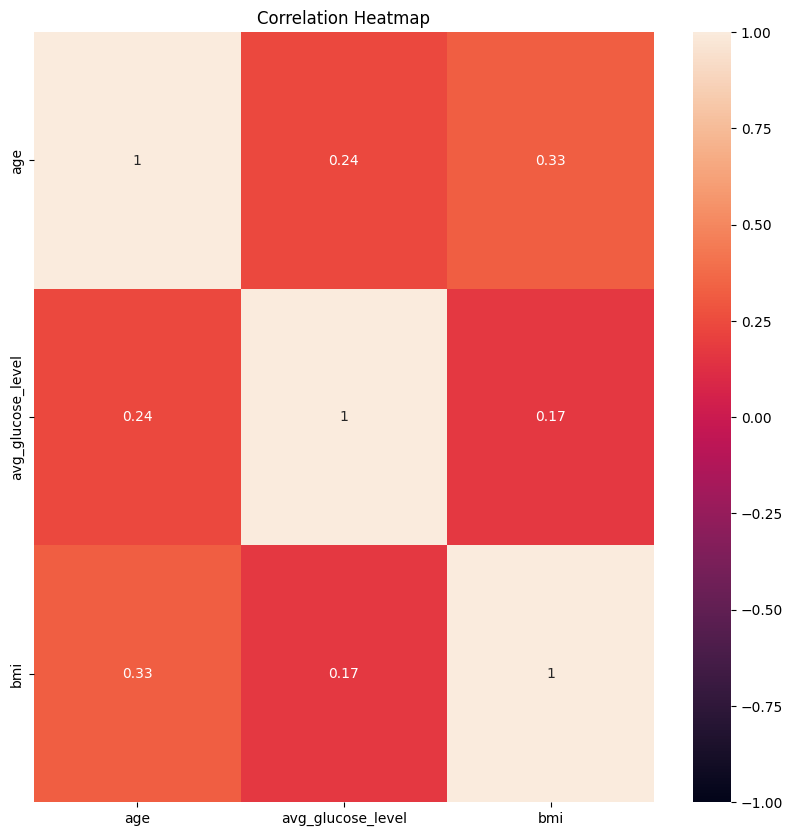

In [ ]:

heatmap = sns.heatmap(data[['age', 'avg_glucose_level', 'bmi']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap');

Sepertinya BMI dan Usia berkorelasi positif, meskipun hubungannya tidak kuat

##Usia

In [ ]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke
    data_pct = data.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    data_pct = data_pct.unstack()
    return data_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

In [ ]:
# Discretize with respective equal-width bin
data['age_binned'] = pd.cut(data['age'], np.arange(0, 91, 5))
data['avg_glucose_level_binned'] = pd.cut(data['avg_glucose_level'], np.arange(0, 301, 10))
data['bmi_binned'] = pd.cut(data['bmi'], np.arange(0, 101, 5))

In [ ]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    data_breakdown = data.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    data_total = data.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    data_pct = data_breakdown / data_total * 100
    # Create proper DataFrame's format
    data_pct = data_pct.unstack()
    return data_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

<Axes: xlabel='age_binned'>

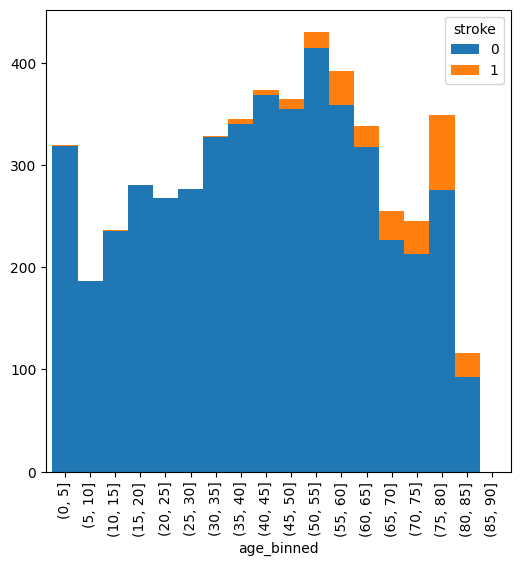

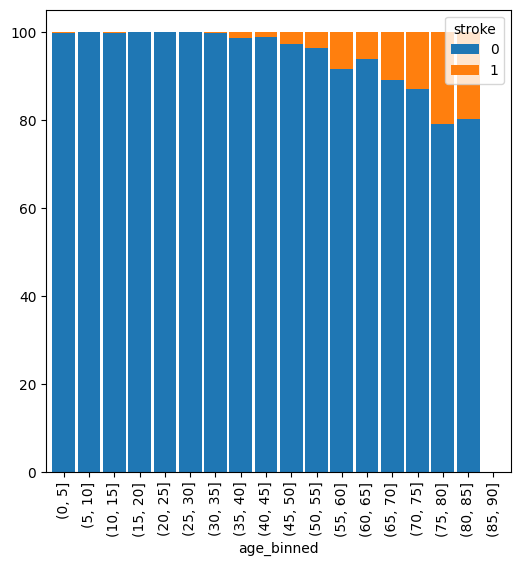

In [ ]:
get_stacked_bar_chart('age_binned')
get_100_percent_stacked_bar_chart('age_binned', width = 0.9)


Untuk atribut numerik, histogram digambarkan untuk menemukan potensi hubungan antara variabel dan stroke.
Dari histogram dapat dilihat bahwa Risiko mengalami stroke meningkat seiring dengan bertambahnya usia pasien. Pasien yang lebih tua lebih mungkin mengalami stroke daripada pasien yang lebih muda.

##BMI

<Axes: xlabel='bmi_binned'>

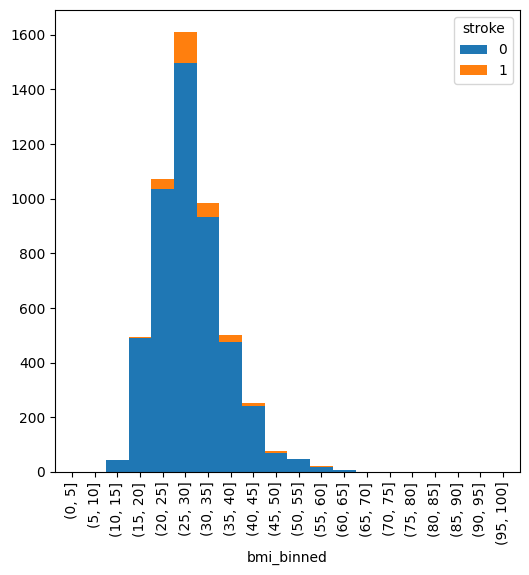

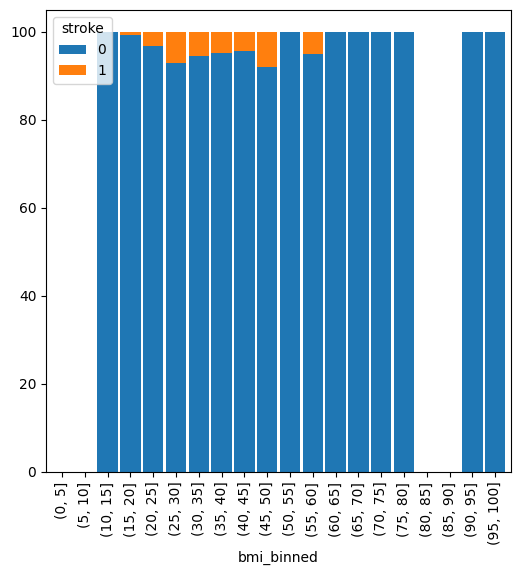

In [ ]:
get_stacked_bar_chart('bmi_binned')
get_100_percent_stacked_bar_chart('bmi_binned', width = 0.9)

Persentase pasien yang memiliki BMI antara 25 dan 35 paling tinggi mengalami stroke dibandingkan dengan pasien dari kelompok lain.
BMI yang lebih tinggi tidak meningkatkan risiko stroke.

##TINGKAT GLUCOSA

<Axes: xlabel='avg_glucose_level_binned'>

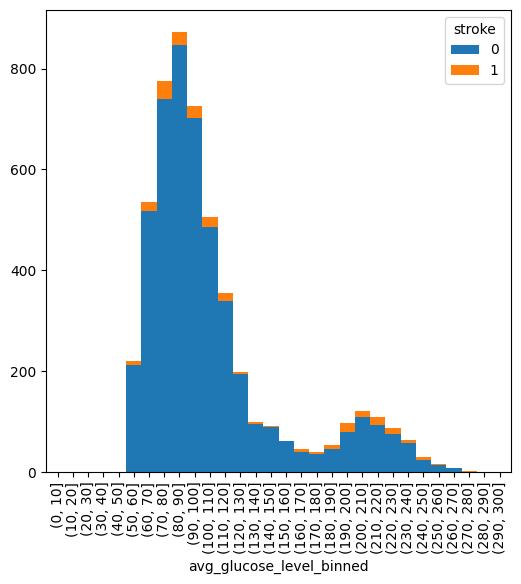

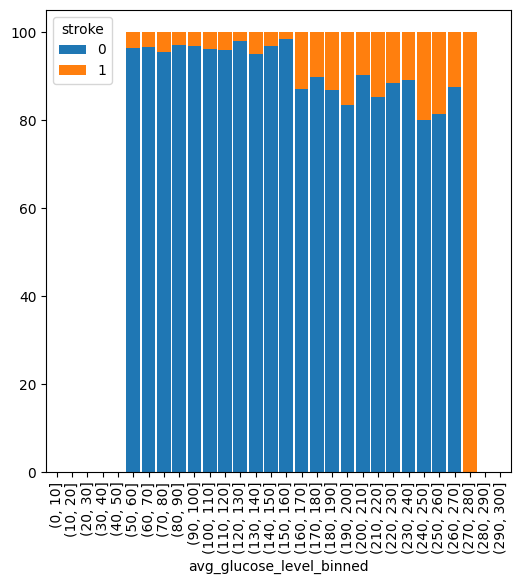

In [ ]:
get_stacked_bar_chart('avg_glucose_level_binned')
get_100_percent_stacked_bar_chart('avg_glucose_level_binned', width = 0.9)


Visualisasi menunjukkan bahwa kejadian stroke terjadi pada beberapa pasien tanpa memandang tingkat glukosa rata-rata yang diukur setelah makan. Meskipun tidak ada kejadian stroke yang dilaporkan pada dua kolom terakhir di sebelah kanan, kolom-kolom ini hanya diwakili oleh 3 pasien, yaitu tidak signifikan. Namun, proporsi lebih tinggi dari pasien yang memiliki tingkat glukosa rata-rata setelah makan lebih dari 150mg/dL (miligram per desiliter) mengalami stroke. Observasi ini dapat dijelaskan oleh adanya diabetes. Diabetes hadir pada pasien yang memiliki pembacaan lebih dari 200mg/dL. Pra-diabetes juga dipertimbangkan pada pasien jika pembacaannya antara 140–199mg/dL.

Diabetes adalah salah satu faktor risiko terjadinya stroke, dan pasien pra-diabetes memiliki risiko stroke yang lebih tinggi.

##Hipertensi, penyakit jantung

<Axes: xlabel='heart_disease'>

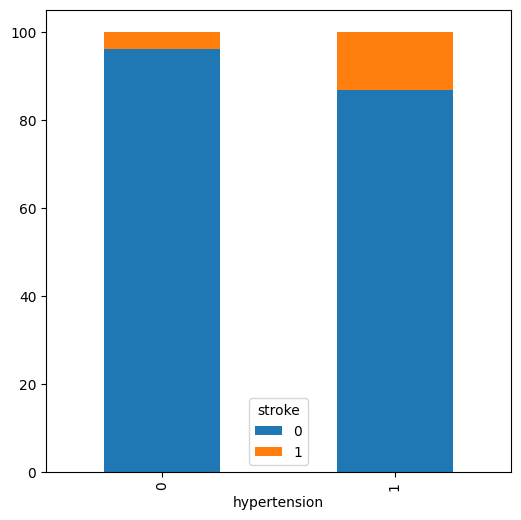

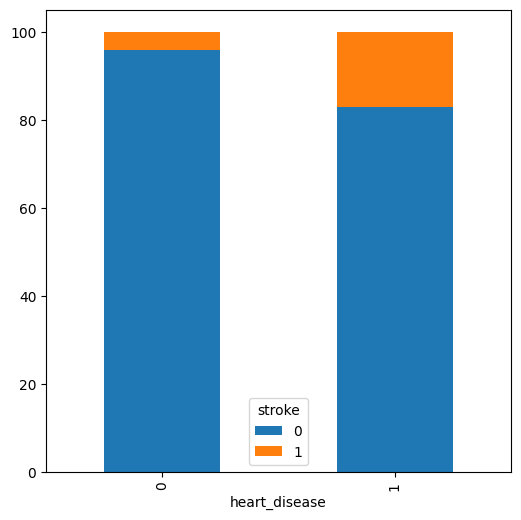

In [ ]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

Proporsi lebih tinggi dari pasien yang menderita hipertensi atau penyakit jantung mengalami stroke, dengan asumsi faktor-faktor lainnya setara.

##Jenis kelamin, tempat tinggal

<Axes: xlabel='Residence_type'>

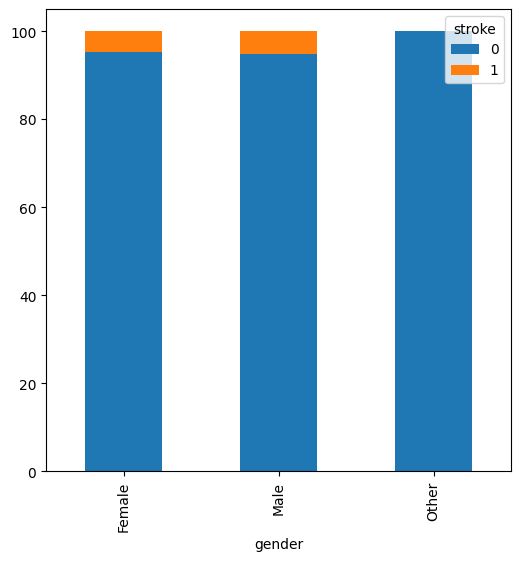

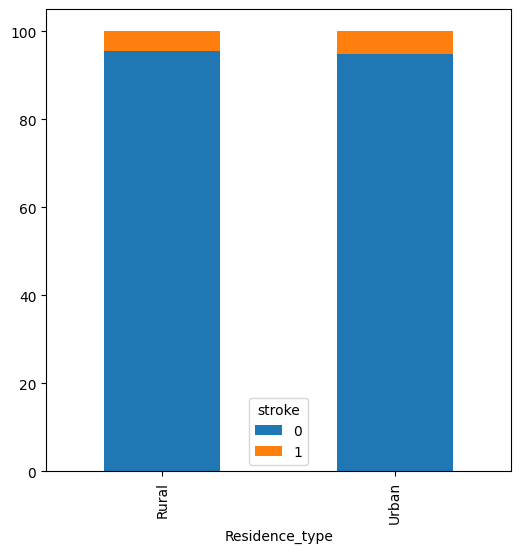

In [ ]:
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')

Tidak peduli jenis kelamin dan tempat tinggal pasien, mereka memiliki kemungkinan yang sama untuk mengalami stroke.

##Jenis pekerjaan

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2925  45.503932
Self-employed   819  60.201465
children        687   6.841339

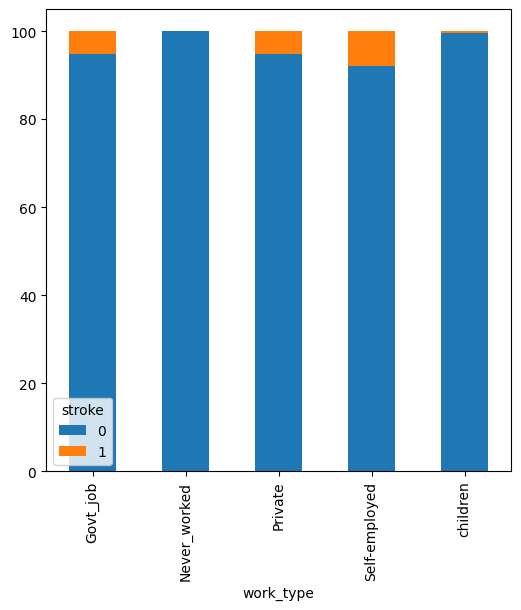

In [ ]:
get_100_percent_stacked_bar_chart('work_type')
data.groupby(['work_type'])[['age']].agg(['count', 'mean'])

Menunjukkan observasi menarik. Pada pandangan pertama, proporsi pasien yang bekerja mandiri dan mengalami stroke relatif lebih tinggi daripada kategori lainnya. Namun, variabel ini sangat terkait dengan usia.

Kategori yang tidak pernah bekerja dan anak-anak cukup mudah dipahami. Hampir tidak ada kejadian stroke tercatat karena usia rata-rata yang lebih rendah. Di sisi lain, usia rata-rata pasien yang bekerja mandiri adalah 59,3 tahun. Ini adalah yang tertinggi di antara semua kategori.

Variabel jenis pekerjaan sangat terkait dengan usia.

## Status pernikahan


age           
             count       mean
ever_married                 
No            1757  22.014229
Yes           3353  54.342082

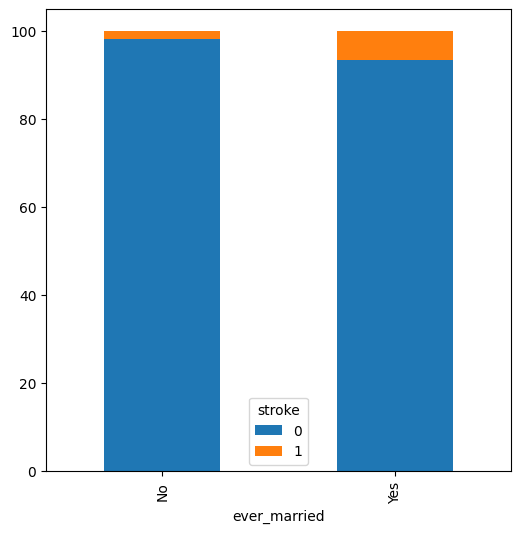

In [ ]:
get_100_percent_stacked_bar_chart('ever_married')
data.groupby(['ever_married'])[['age']].agg(['count', 'mean'])

Menunjukkan observasi serupa dengan variabel jenis pekerjaan. Namun, grafik atas menampilkan perbedaan yang mencolok dalam rata-rata usia kedua kategori.

Variabel status pernikahan sangat terkait dengan usia.

#Model Training

##Feature Selection


In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


##Outlier Removal

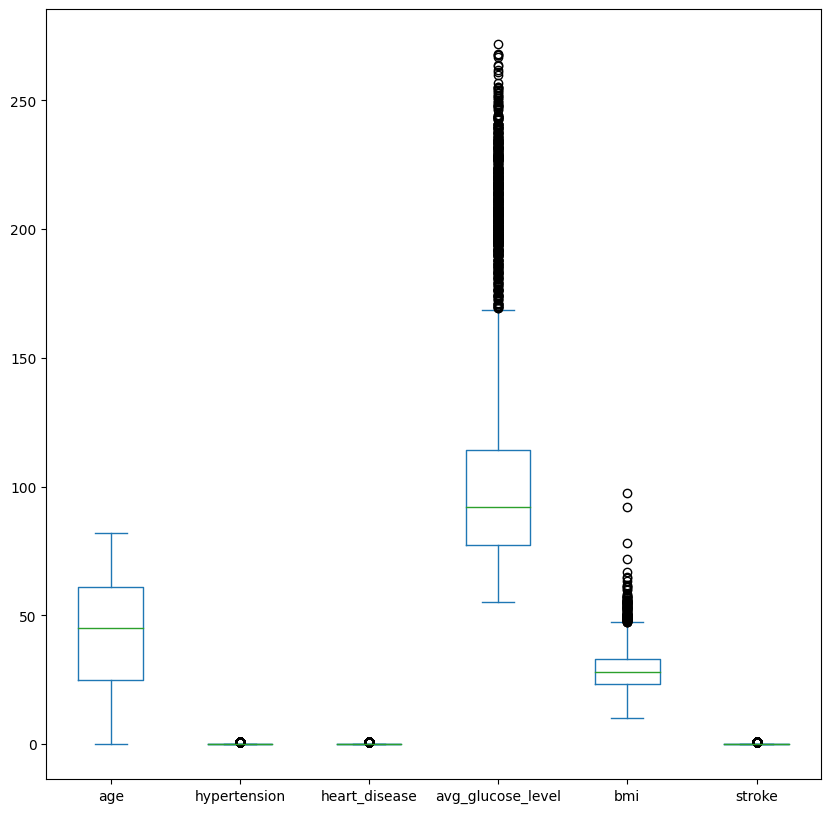

In [ ]:
data.plot(kind='box')
plt.show()

In [ ]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
data[data['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


##Label Encoding

In [ ]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
gender=enc.fit_transform(data['gender'])
smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [ ]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [ ]:
data['gender']=gender
data['Residence_type']=Residence_type
data['work_type']=work_type
data['smoking_status']=smoking_status
data['ever_married']=ever_married

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


##Partition (splitting the data for train and test)
Membagi kedalam 2 bagian 80% dan 20%

*   X train = berisi data dari fitur2 yg digunakan (tanpa nilai target) untuk melatih model
*  Y train = berisi data nilai target
*   X test = berisi data dari fitur2 untuk menguji model
*   Y test = data nilai target (jawaban)








In [ ]:
X = data.drop('stroke',axis=1)

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
Y=data['stroke']

In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [ ]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [ ]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

##Normalization

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [ ]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.03468536, 0.17458824, 0.03073554, 0.02706233, 0.00953771,
       0.03980226, 0.055405  , 0.34386165, 0.22183815, 0.06248376])

In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

Dari output pemilihan feature important dapat diketahui bahwa avg glucose level merupakan fitur pling penting dengan nilai prob 0.343 setelahnya fitur bmi dan juga fitur age, 0.22 dan 0.17

In [ ]:
Y_predict = dt.predict(X_test_std)

In [ ]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
ac_dt = accuracy_score(Y_test,Y_predict)

In [ ]:
ac_dt

0.9070450097847358

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [ ]:
Y_predict_lr = lr.predict(X_test_std)

In [ ]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [ ]:
ac_lr = accuracy_score(Y_test,Y_predict_lr)

In [ ]:
ac_lr

0.9471624266144814

##K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [ ]:
Y_predict_kn = knn.predict(X_test_std)

In [ ]:
ac_knn = accuracy_score(Y_test,Y_predict_kn)

In [ ]:
ac_knn

0.9452054794520548

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [ ]:
Y_predict_rf=rf.predict(X_test_std)

In [ ]:
ac_rf=accuracy_score(Y_test,Y_predict_rf)

In [ ]:
ac_rf

0.9461839530332681

##Support Vector Machine

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,Y_train)
y_pred_svm = classifier.predict(X_test)

In [ ]:
print(y_pred_svm)

[0 0 0 ... 0 0 0]


In [ ]:
pd.DataFrame(y_pred_svm).to_csv("prediction.csv")

In [ ]:
dfpred = pd.read_csv('/content/prediction.csv')

In [ ]:
dfpred

,Unnamed: 0,0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1017,1017,0
1018,1018,0
1019,1019,0
1020,1020,0


import numpy as np
from google.colab import autoviz
df_1596267533659574981 = autoviz.get_df('df_1596267533659574981')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1596267533659574981, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1596267533659574981 = autoviz.get_df('df_1596267533659574981')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1596267533659574981, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1596267533659574981 = autoviz.get_df('df_1596267533659574981')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1596267533659574981, *['Unnamed: 0', 'count()', None], **{})
chart

In [ ]:
pd.DataFrame(X_test).to_csv("Testing.csv")

In [ ]:
pd.DataFrame(Y_test).to_csv("Ytest.csv")

In [ ]:
yact = pd.read_csv('/content/Ytest.csv')
yact

,Unnamed: 0,stroke
0,5031,0
1,4017,0
2,744,0
3,1799,0
4,2314,0
...,...,...
1017,4795,0
1018,4641,0
1019,1320,0
1020,1098,0


###Evaluation SVM

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred_svm,labels=[0,1])
print(cm)

[[968   0]
 [ 54   0]]


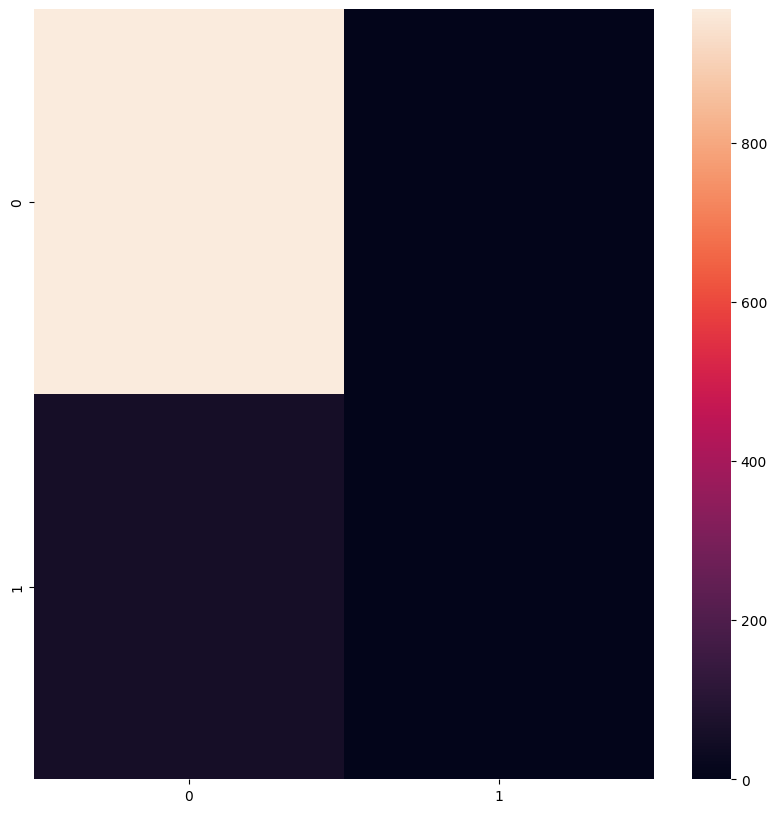

In [ ]:
sns.heatmap(cm)
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv.fit(X_train_std,Y_train)

SVC()

In [ ]:
Y_predict_sv=sv.predict(X_test_std)

In [ ]:
ac_sv=accuracy_score(Y_test,Y_predict_sv)

In [ ]:
ac_sv

0.9471624266144814

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict_sv))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#VISUALIZING THE RESULT

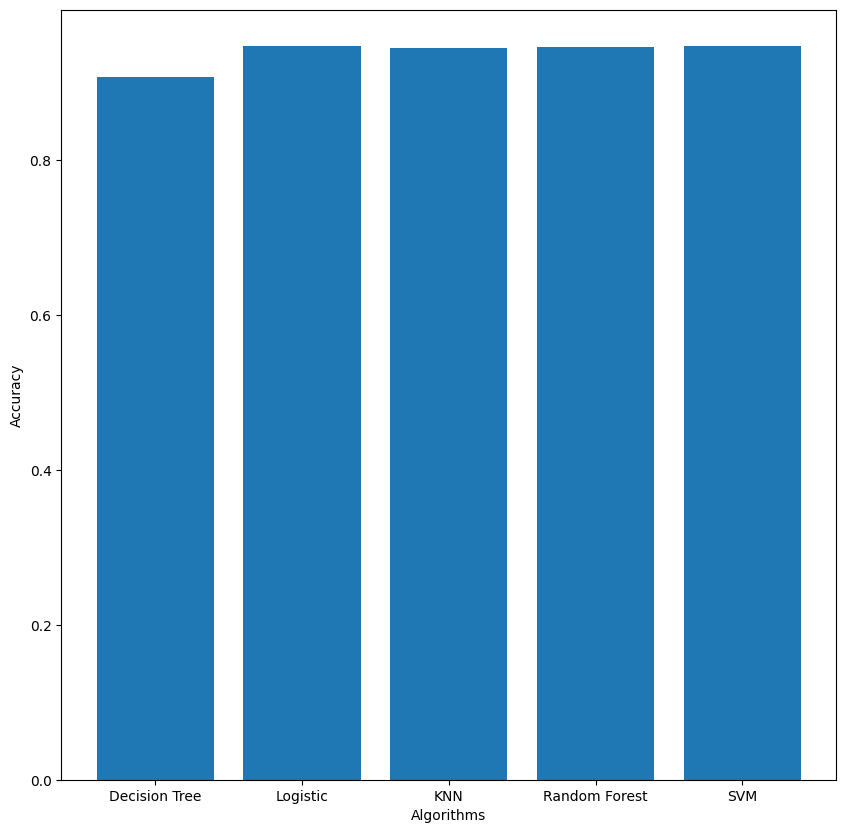

In [ ]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import pickle
pickle.dump()